<font size="6" color = "blue"><b>ch10. Pandas (데이터프레임, 시리즈)</b></font>
- pip install pandas (cmd창에서 실행) ;아나콘다로 설치하면 이미 존재

# 1절. 판다스 패키지
- 데이터 분석을 위한 반드시 알아야 할 패키지. 넘파이를 기반으로 하며, 다른 라이브러리와 잘 통합되어 설계
- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임을 제공
- 결측치 처리, 크기변경(열 삭제/추가, 행 삭제/추가), 데이터 정렬, 데이터 분할/병합, 통계 처리, 부분 데이터 추출, 파일 입출력, 레이블링, 시각화 용이, ...

In [1]:
import pandas as pd
pd.__version__

'2.1.4'

In [2]:
data = pd.read_json('data/ch10_member1.json', encoding="CP949") # 디폴트가 UTF-8 # 알아서 열고 닫아줌.
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [3]:
data = pd.read_json('data/ch10_member2.json') # UTF-8로 read
data

,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [4]:
member1 = pd.read_csv('data/ch09_member1.csv', header=None, 
                      names=['name', 'age', 'email', 'address'], encoding="utf-8") # encoding="utf-8" 기본값이라 생략가능
member1

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,shin@hong.com,서울시 강서구
5,신길동,28,dong@hong.com,서울시 강서동


# 2절. 데이터 프레임 만들기
## 2.1 딕셔너리를 이용해서 데이터 프레임 만들기

In [5]:
d = {'name':['홍길동', '신길동'], 'age':[20,30]}
df = pd.DataFrame(data=d)
df

,name,age
0,홍길동,20
1,신길동,30


## 2.2 리스트를 이용하여 데이터 프레임 만들기

In [6]:
d = [{'name' : '홍길동', 'age':20}, {'name':'신길동', 'age':30}]
df = pd.DataFrame(data=d)
df

,name,age
0,홍길동,20
1,신길동,30


## 2.3 read_csv()

In [7]:
df = pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding="CP949")
df.shape # 행, 열

(17, 22)

In [8]:
df.head(2) # 상위 2줄 # 디폴트 :5줄

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [9]:
pd.options.display.max_columns # 최대 디스플레이될 수 있는 colums 수

20

In [10]:
pd.options.display.max_columns = 22
df.sample()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


## 2.4 sklearn, statsmodels, searborn 등의 라이브러리에서 데이터프레임 불러오기

In [11]:
import statsmodels.api as sm
iris = sm.datasets.get_rdataset('iris', package='datasets').data
iris.tail() # 끝에서부터 5행보기

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# 3절. 이름(열, 행) 지정하기

In [12]:
member_df = pd.read_csv('data/ch09_member1.csv', header=None)
member_df

,0,1,2,3
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,shin@hong.com,서울시 강서구
5,신길동,28,dong@hong.com,서울시 강서동


In [13]:
# 열이름 지정하기
member_df.columns = ['name', 'age', 'email', 'address']
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,shin@hong.com,서울시 강서구
5,신길동,28,dong@hong.com,서울시 강서동


In [14]:
member_df = pd.concat([member_df, member_df])
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,shin@hong.com,서울시 강서구
5,신길동,28,dong@hong.com,서울시 강서동
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구


In [15]:
member_df.index

Index([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype='int64')

In [16]:
member_df.index = range(len(member_df))
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,shin@hong.com,서울시 강서구
5,신길동,28,dong@hong.com,서울시 강서동
6,홍길동,20,hong@hong.com,서울시 강동구
7,박길서,33,park@hong.com,부산시 강서구
8,박길남,23,gil@hong.com,서울시 강남구
9,김길북,20,kim@hong.com,서울시 강북구


In [17]:
# name을 행이름
# member_df = member_df.set_index("name") # inplace=False 적용된 내용 return 
member_df.set_index("name", inplace=True) # inplace=True 데이터프레임에 적용
member_df

,age,email,address
name,,,
홍길동,20,hong@hong.com,서울시 강동구
박길서,33,park@hong.com,부산시 강서구
박길남,23,gil@hong.com,서울시 강남구
김길북,20,kim@hong.com,서울시 강북구
신길서,40,shin@hong.com,서울시 강서구
신길동,28,dong@hong.com,서울시 강서동
홍길동,20,hong@hong.com,서울시 강동구
박길서,33,park@hong.com,부산시 강서구
박길남,23,gil@hong.com,서울시 강남구


In [18]:
# 행이름을 컬럼에 편입시키기
# member_df.reset_index() #reset 적용한 것을 return
member_df.reset_index(inplace=True) # reset을 member_df에 적용
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,shin@hong.com,서울시 강서구
5,신길동,28,dong@hong.com,서울시 강서동
6,홍길동,20,hong@hong.com,서울시 강동구
7,박길서,33,park@hong.com,부산시 강서구
8,박길남,23,gil@hong.com,서울시 강남구
9,김길북,20,kim@hong.com,서울시 강북구


In [19]:
name = member_df['name'] # 시리즈 # 한 열만 가져올때
print(type(name))
name

<class 'pandas.core.series.Series'>


0     홍길동
1     박길서
2     박길남
3     김길북
4     신길서
5     신길동
6     홍길동
7     박길서
8     박길남
9     김길북
10    신길서
11    신길동
Name: name, dtype: object

In [20]:
member = member_df.loc[0] # 한 행만 가져올때 # 0번 인덱스 행 => 시리즈
print(type(member))
member

<class 'pandas.core.series.Series'>


name                 홍길동
age                   20
email      hong@hong.com
address          서울시 강동구
Name: 0, dtype: object

In [21]:
member_df.info() # 결측치 확인, type을 볼 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     12 non-null     object
 1   age      12 non-null     int64 
 2   email    12 non-null     object
 3   address  12 non-null     object
dtypes: int64(1), object(3)
memory usage: 516.0+ bytes


In [22]:
member_df['age'] = member_df['age'].astype('float64') # 데이터 프레임의 한 열의 타입을 변경

In [23]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     12 non-null     object 
 1   age      12 non-null     float64
 2   email    12 non-null     object 
 3   address  12 non-null     object 
dtypes: float64(1), object(3)
memory usage: 516.0+ bytes


# 4절. 부분 데이터 조회
- 특정 열, 특정 행, 특정 행의 특정 열, 특정 조건의 행의 모든 열, 특정 조건의 행의 특정 열

In [24]:
member = pd.read_csv('data/ch09_member2.csv')
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,shin@hong.com,서울시 강서구
5,신길동,28,dong@hong.com,서울시 강서동


## 4.1 단일열 조회
- 가장 잘 안씀

In [25]:
member['name'] # 시리즈

0    홍길동
1    박길서
2    박길남
3    김길북
4    신길서
5    신길동
Name: name, dtype: object

In [26]:
member['name'].to_frame() # 시리즈를 데이터 프레임으로

,name
0,홍길동
1,박길서
2,박길남
3,김길북
4,신길서
5,신길동


## 4.2 loc[]을 이용한 이름(열, 행)으로 조회
- 단일 행, 여러 행, 여러 열, 행과 열을 동시에 접근
- 데이터프레임.loc[행(행 슬라이싱), 열(열 슬라이싱)]
- 가장 많이 사용

In [27]:
# 단일 행
member.loc[0] # 시리즈

name                 홍길동
age                   20
email      hong@hong.com
address          서울시 강동구
Name: 0, dtype: object

In [28]:
# 여러 행
member.loc[0:4] # 0행부터 5행까지

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,shin@hong.com,서울시 강서구


In [29]:
# 여러 열
member.loc[:,'name':'email'] # 무조건 행이 먼저, 모든 행을 쓸거면 ':'

,name,age,email
0,홍길동,20,hong@hong.com
1,박길서,33,park@hong.com
2,박길남,23,gil@hong.com
3,김길북,20,kim@hong.com
4,신길서,40,shin@hong.com
5,신길동,28,dong@hong.com


In [30]:
# 여러 열 (name열과 email열)
member.loc[:, ['name','email']]

,name,email
0,홍길동,hong@hong.com
1,박길서,park@hong.com
2,박길남,gil@hong.com
3,김길북,kim@hong.com
4,신길서,shin@hong.com
5,신길동,dong@hong.com


In [31]:
# 1행부터 4행까지 name과 email
member.loc[1:4, ['name', 'email']]

,name,email
1,박길서,park@hong.com
2,박길남,gil@hong.com
3,김길북,kim@hong.com
4,신길서,shin@hong.com


In [32]:
# 1과 4행, name, email, address 출력
member.loc[[1,4],['name','email', 'address']]

,name,email,address
1,박길서,park@hong.com,부산시 강서구
4,신길서,shin@hong.com,서울시 강서구


In [33]:
# 1~4행, name~email열 출력
member.loc[1:4, 'name':'email'] # loc사용 시 index이름과 column 이름을 사용

,name,age,email
1,박길서,33,park@hong.com
2,박길남,23,gil@hong.com
3,김길북,20,kim@hong.com
4,신길서,40,shin@hong.com


## 4.3 iloc[]을 이용한 숫자(인덱스)로 조회
- 몇 번째 행부터 몇 번째 행 앞까지, 몇 번째 열부터 몇 번째 열 앞까지, 음수 가능 / 슬라이싱과 같음

In [34]:
member.iloc[0:4] # 슬라이싱 from:to:step -> from부터 to 앞까지 step씩

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구


In [35]:
member.iloc[0,0:3] # 0행, 0열부터 3열 앞까지

name               홍길동
age                 20
email    hong@hong.com
Name: 0, dtype: object

In [36]:
# 맨 오른쪽 열을 제외하고 출력
member.iloc[:, :-1]

,name,age,email
0,홍길동,20,hong@hong.com
1,박길서,33,park@hong.com
2,박길남,23,gil@hong.com
3,김길북,20,kim@hong.com
4,신길서,40,shin@hong.com
5,신길동,28,dong@hong.com


In [37]:
# 0,2,4,6,... 짝수번째 행의 모든 열 출력
member.iloc[::2]

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
2,박길남,23,gil@hong.com,서울시 강남구
4,신길서,40,shin@hong.com,서울시 강서구


In [38]:
# member의 행 순서를 역순 출력 (맨 마지막열을 제외하고)
member.iloc[::-1,:-1]

,name,age,email
5,신길동,28,dong@hong.com
4,신길서,40,shin@hong.com
3,김길북,20,kim@hong.com
2,박길남,23,gil@hong.com
1,박길서,33,park@hong.com
0,홍길동,20,hong@hong.com


## 4.4 조건으로 조회하기

In [39]:
# 30살 이상의 데이터 출력
member.loc[member['age'] > 30] # 인덱스 대신 조건

,name,age,email,address
1,박길서,33,park@hong.com,부산시 강서구
4,신길서,40,shin@hong.com,서울시 강서구


In [40]:
# 강서구 사는 사람 출력
address = "서울시 강동구"
address.find('강동구') # 찾으면 인덱스 반환, 못찾으면 -1반환

4

In [41]:
# 시리즈에 문자함수를 사용하는 방법
# https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling
member['address'].str.find('강서구') != -1

0    False
1     True
2    False
3    False
4     True
5    False
Name: address, dtype: bool

In [42]:
# address가 '강서구'인 데이터의 name, age, address를 출력하시오.
member.loc[member['address'].str.find('강서구') != -1, ['name', 'age', 'address']]

,name,age,address
1,박길서,33,부산시 강서구
4,신길서,40,서울시 강서구


In [43]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     6 non-null      object
 1   age      6 non-null      int64 
 2   email    6 non-null      object
 3   address  6 non-null      object
dtypes: int64(1), object(3)
memory usage: 324.0+ bytes


In [44]:
member.isna().sum() # .isna() : 결측치 있으면 True, .sun()으로 다 더해서 확인할 수 있음

name       0
age        0
email      0
address    0
dtype: int64

In [45]:
# iris
import seaborn as sns
iris_df = sns.load_dataset('iris')
# 0~49 setosa / 50~ 99 versicolor / 100~149 virginica
iris_df.loc[48:60].head()

,sepal_length,sepal_width,petal_length,petal_width,species
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor


In [46]:
# spacies가 versicolor인 데이터의 모든 열
iris_df[iris_df['species'] == 'versicolor'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [47]:
# spacies가 versicolor인 데이터의 맨 마지막 열을 제외한 데이터
iris_df.loc[iris_df['species'] == 'versicolor', 'sepal_length': 'petal_width'].head()

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [48]:
# spacies가 versicolor인 데이터의 맨 마지막 열을 제외한 데이터
iris_df.iloc[:, :-1][iris_df['species'] == 'versicolor']

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
55,5.7,2.8,4.5,1.3
56,6.3,3.3,4.7,1.6
57,4.9,2.4,3.3,1.0
58,6.6,2.9,4.6,1.3
59,5.2,2.7,3.9,1.4


In [49]:
# sepal_length가 6.2보다 크고, spacies가 versicolor인 데이터를 출력
iris_df[(iris_df.species == 'versicolor') & (iris_df.sepal_length > 6.2)] # iris_df['species'] == iris_df.species
                                                                          # 파이썬에서는 &의 우선순위가 높기 떄문에 괄호 필수!

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
56,6.3,3.3,4.7,1.6,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
72,6.3,2.5,4.9,1.5,versicolor
74,6.4,2.9,4.3,1.3,versicolor
75,6.6,3.0,4.4,1.4,versicolor


In [50]:
# sepal_length가 6.2보다 크고, spacies가 versicolor인 데이터의 sepal_length와 species, sepal_width를 출력
iris_df.loc[(iris_df.species == 'versicolor') & (iris_df.sepal_length > 6.2), ['sepal_length', 'sepal_width', 'species']]

,sepal_length,sepal_width,species
50,7.0,3.2,versicolor
51,6.4,3.2,versicolor
52,6.9,3.1,versicolor
54,6.5,2.8,versicolor
56,6.3,3.3,versicolor
58,6.6,2.9,versicolor
65,6.7,3.1,versicolor
72,6.3,2.5,versicolor
74,6.4,2.9,versicolor
75,6.6,3.0,versicolor


# 5절. 데이터 추가 및 삭제

In [51]:
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,shin@hong.com,서울시 강서구
5,신길동,28,dong@hong.com,서울시 강서동


In [52]:
import numpy as np
member['major'] = ['컴공', '전기', '전자', '기계', 'AI', np.nan] # np.nan로 결측치 넣기
member

,name,age,email,address,major
0,홍길동,20,hong@hong.com,서울시 강동구,컴공
1,박길서,33,park@hong.com,부산시 강서구,전기
2,박길남,23,gil@hong.com,서울시 강남구,전자
3,김길북,20,kim@hong.com,서울시 강북구,기계
4,신길서,40,shin@hong.com,서울시 강서구,AI
5,신길동,28,dong@hong.com,서울시 강서동,NaN


In [53]:
hobby = pd.DataFrame({'hobby' : ['놀기', '자기', '읽기', '먹기', '공부', '명상']})
hobby

,hobby
0,놀기
1,자기
2,읽기
3,먹기
4,공부
5,명상


In [54]:
member = pd.concat([member, hobby], axis=1) # 디폴트는 행 병합 / axis=1 열 병합
member

,name,age,email,address,major,hobby
0,홍길동,20,hong@hong.com,서울시 강동구,컴공,놀기
1,박길서,33,park@hong.com,부산시 강서구,전기,자기
2,박길남,23,gil@hong.com,서울시 강남구,전자,읽기
3,김길북,20,kim@hong.com,서울시 강북구,기계,먹기
4,신길서,40,shin@hong.com,서울시 강서구,AI,공부
5,신길동,28,dong@hong.com,서울시 강서동,NaN,명상


In [55]:
member.drop(['hobby', 'major'], axis = 1, inplace=True) # member바꾸기 
                                                        # 1) inplace=True 또는 
                                                        # 2) member = member.drop(['hobby', 'major'], axis = 1)
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,shin@hong.com,서울시 강서구
5,신길동,28,dong@hong.com,서울시 강서동


In [56]:
# 행 삭제
member.drop(4, inplace=True)
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
5,신길동,28,dong@hong.com,서울시 강서동


In [57]:
member = member.drop(1)
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
5,신길동,28,dong@hong.com,서울시 강서동


In [58]:
member.index = range(len(member))
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길남,23,gil@hong.com,서울시 강남구
2,김길북,20,kim@hong.com,서울시 강북구
3,신길동,28,dong@hong.com,서울시 강서동


# 6절. 정렬

In [59]:
member.sort_index(ascending=False, inplace=True) # 인덱스 정렬

In [60]:
# 특정열의 값 기준 정렬
member.sort_values(by=['name', 'age'], inplace=True) # by는 키워드 인수로 꼭! 써야함. 'name'이 같으면 'age' 순서로
member

,name,age,email,address
2,김길북,20,kim@hong.com,서울시 강북구
1,박길남,23,gil@hong.com,서울시 강남구
3,신길동,28,dong@hong.com,서울시 강서동
0,홍길동,20,hong@hong.com,서울시 강동구


# 7장. 기초통계 분석
- count : NA(결측치)를 제외한 개수
- min
- max
- sum
- mean
- std : 표준편차
- var : 분산
- quantile 분위수(1사분위수, 2사분위수, 3사분위수)
- median
- corr : 상관관계

In [61]:
iris_df.iloc[:,:-1].min(axis = 1) # 행마다 모든 열 최소값

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

In [62]:
iris_df.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [63]:
iris_df.iloc[:,:-1].mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [64]:
iris_df.iloc[:,:-1].std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [65]:
iris_df.describe() # 수치형 데이터의 개수, 평균, 표준편차, 최소 최대, 사분위수

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [66]:
iris_df["species"].describe() # 범주형 데이터 : 전체개수, 종류, 가장 많은 종류, 가장 많은 종류의 개수

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [67]:
iris_df.describe(include='all') # 수치형과 범주형 데이터 모두 describe

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [68]:
iris_df[iris_df['species'].isna()] # species가 결측치인 행을 출력

,sepal_length,sepal_width,petal_length,petal_width,species


# 8절. 그룹화

In [69]:
iris_df.groupby(['species']).mean() # 종류 별로 평균

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [70]:
iris_group = iris_df.groupby(['species'])
iris_group.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


# 연습문제

In [71]:
# 1. iris 데이터에서 처음 다섯개 행만 출력하세요
iris.iloc[:5]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [72]:
# 2.iris 데이터를 데이터프레임 변수인 독립변수 X와 종속변수 y로 나누세요. 
# hint: y = iris.loc[:, ‘species’].to_frame()
X = iris.iloc[:, :-1]
y = iris.loc[:, 'Species'].to_frame()

In [73]:
X.sample()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
19,5.1,3.8,1.5,0.3


In [74]:
y.sample()

,Species
149,virginica


In [75]:
# 3. iris 데이터에서 처음 50개행을 빼내서 temp변수에 저장하세요
temp = iris.iloc[:50]
temp

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [76]:
# 4.3번에서 선택한 데이터프레임의 요약정보를 출력하세요. 
#   모든 열에 대해 요약정보가 출력되어야 합니다.
iris_df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [77]:
# 5. versicolor종의 데이터만 iris_versicolor변수에 저장하세요
iris_versicolor = iris[iris.Species == 'versicolor']
iris_versicolor

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [78]:
# 6. 2번의 2번의 X와 y변수를 합해서 iris_df데이터 프레임으로 만드세요
#    hint : X와 y합하기 : pd.concat([X, y], axis=1)
iris_df = pd.concat([X,y], axis=1)
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [79]:
# 7. iris 데이터의 각 열 평균값을 출력하세요.
iris_df.iloc[:,:-1].mean()

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [80]:
# 8. iris 데이터의 각 열들 사이의 상관계수를 출력하세요
r = iris_df.iloc[:,:-1].corr()
r

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

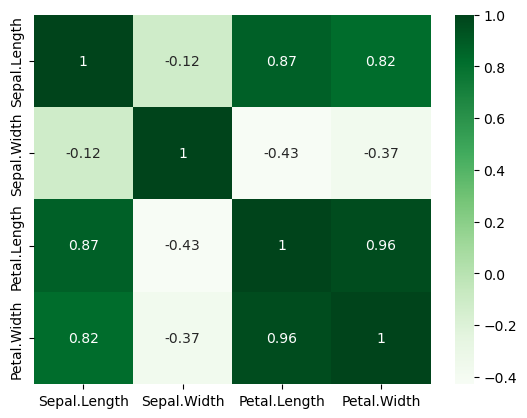

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(12,6)) # 그래프 크기
sns.heatmap(r, annot=True, cmap="Greens") # annot=True 숫자 나타내기
# seaborn 라이브러리 업그레이드 : 아나콘다 프롬프트 pip install seaborn --upgrade
# seaborn 라이브러리 업그레이드 확인 : pip show seaborn

In [83]:
# 9. iris 데이터의 종별 평균을 출력하세요
iris_df.groupby(['Species']).mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026
